# Exercise 1 Implementation

In [12]:
# Imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# Load the source file with the face data
mat_content = sio.loadmat('face.mat')
mat_content # Let's see the content...

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

In [13]:
# Store face data and classification
face_data = mat_content['X']
face_label = mat_content['l'] # Not actually used for PCA training, needed for testing

# Append the matching data and labels into array 'faces': unnecessary for PCA training as the labels are not used (unsupervised learning)
# But we need it later for assessing our algorithms during testing
faces = np.append(face_data, face_label, axis=0)

# Check data and correct dimensions
print(face_data) # Each column represents one face image, each row a pixel value for a particular coordinate of the image
print(face_data.shape) # 520 data points in 2576 dimensions
print (face_label)
print (face_label.shape) # 520 data points
print(faces)
print(faces.shape)

#Transpose in preparation for division into training and testing material
faces_transposed = faces.T
print (faces_transposed, faces_transposed.shape)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 37  40  22 ...  87 102  93]
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]]
(2576, 520)
[[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
   3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
   5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
   8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
  10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
  13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
  15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
  17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
  20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
  22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
  25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 

[[100 102 132 ...  44  47  20]
 [ 87  61  67 ...  11  12  13]
 [ 90  91  91 ...  98  97  43]
 ...
 [141 151 158 ...  21  20  51]
 [ 51  76  74 ...  26  25   2]
 [250 249 240 ...  35  32  18]] (520, 2577)
[[100 102 132 ...  44  47  20]
 [ 87  61  67 ...  11  12  13]
 [ 90  91  91 ...  98  97  43]
 ...
 [138 129 117 ...  22  24  30]
 [193 193 192 ...  21  21  24]
 [ 89  93  91 ...  37  36  45]] (416, 2577)
[[101 108 105 ...  11  10  41]
 [210 158 123 ...  31  31  32]
 [251 253 253 ... 153 165  35]
 ...
 [141 151 158 ...  21  20  51]
 [ 51  76  74 ...  26  25   2]
 [250 249 240 ...  35  32  18]] (104, 2577)
[126 118 124 ...  33  25  31] (2577,)
[[126 118 124 ...  25  23  21]
 [126 122 126 ...  21  19  21]
 [123 124 122 ...  22  19  20]
 ...
 [142 139 146 ...  40  39  31]
 [143 141 146 ...  45  36  34]
 [144 141 149 ...  51  33  25]] (46, 56)


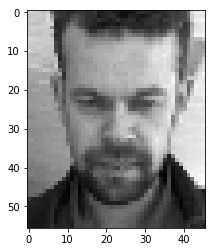

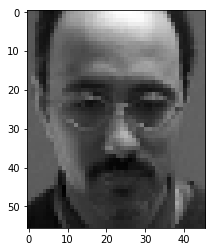

In [14]:
#Divide the data set into training and testing sets: 80% is training, 20% is testing

np.random.shuffle(faces_transposed) # Shuffle the rows (This is why we transposed)
print(faces_transposed, faces_transposed.shape)
training, test = faces_transposed[:416,:], faces_transposed[416:,:]
print (training, training.shape)
print (test, test.shape)

image_99 = faces_transposed[99]
print(image_99, image_99.shape)
image_99 = np.reshape(image_99[:2576], (46, 56))
print (image_99, image_99.shape)
plt.imshow(image_99.T, cmap = 'gist_gray') # It is a person, so the data manipulation makes sense so far
plt.figure()
plt.imshow(np.reshape(faces_transposed[100, :2576], (46,56)).T, cmap = 'gist_gray') # print 100th image as a sanity check to make sure we have shuffled along the right dimension of the array

[[100 102 132 ...  44  44  47]
 [ 87  61  67 ...  12  11  12]
 [ 90  91  91 ... 105  98  97]
 ...
 [138 129 117 ...  22  22  24]
 [193 193 192 ...  21  21  21]
 [ 89  93  91 ...  37  37  36]] (416, 2576)
[122.54326923 123.         120.22596154 ...  84.32692308  82.76201923
  81.20913462] (2576,)


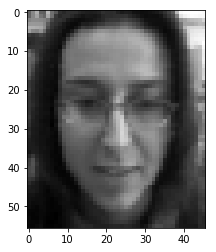

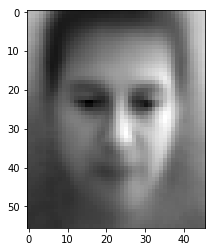

In [15]:
# Now let's start image recognition by PCA
# We have face images that are CENTERED and they are of the SAME SIZE (needed for PCA)
# They are normalised for SCALE, ORIENTATION and TRANSLATION

# First, we only need the training face set without the labels
# Images are represented as rows of the array 'pca_train'
pca_train = training [:, :2576]
pca_test = test [:, :2576]
print (pca_train, pca_train.shape)
plt.imshow(np.reshape(pca_train[0, :], (46,56)).T, cmap = 'gist_gray') # show the first face image

# Let's compute the average face vector
avg_face = np.mean(pca_train, axis=0)
print (avg_face, avg_face.shape)
plt.figure()
plt.imshow(np.reshape(avg_face, (46,56)).T, cmap = 'gist_gray')

[[100 102 132 ...  44  44  47]
 [ 87  61  67 ...  12  11  12]
 [ 90  91  91 ... 105  98  97]
 ...
 [138 129 117 ...  22  22  24]
 [193 193 192 ...  21  21  21]
 [ 89  93  91 ...  37  37  36]] (416, 2576)
[122.54326923 123.         120.22596154 ...  84.32692308  82.76201923
  81.20913462] (2576,)
[[-22.54326923 -21.          11.77403846 ... -40.32692308 -38.76201923
  -34.20913462]
 [-35.54326923 -62.         -53.22596154 ... -72.32692308 -71.76201923
  -69.20913462]
 [-32.54326923 -32.         -29.22596154 ...  20.67307692  15.23798077
   15.79086538]
 ...
 [ 15.45673077   6.          -3.22596154 ... -62.32692308 -60.76201923
  -57.20913462]
 [ 70.45673077  70.          71.77403846 ... -63.32692308 -61.76201923
  -60.20913462]
 [-33.54326923 -30.         -29.22596154 ... -47.32692308 -45.76201923
  -45.20913462]] (416, 2576)
(2576, 416)
[[1026487.22115385  967168.          872986.93269231 ... -199959.88461538
  -223634.21634615 -222209.26442308]
 [ 967168.         1080258.         1013

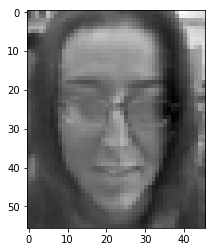

In [16]:
# Now let's subtract the mean face from all of our face images
print (pca_train, pca_train.shape)
print (avg_face, avg_face.shape)
pca_train_norm = pca_train-avg_face # works because of broadcasting
print (pca_train_norm, pca_train_norm.shape)
plt.imshow(np.reshape(pca_train_norm[0, :], (46,56)).T, cmap = 'gist_gray') 
# Show the first normalised face image and compare it to the previously printed image: not the same

pca_train_norm_transposed = pca_train_norm.T
print (pca_train_norm_transposed.shape)
# Computing the covariance matrix
cov = np.dot(pca_train_norm_transposed, pca_train_norm)
print (cov, cov.shape)
cov = cov/416
print (cov, cov.shape)

In [25]:
# Computing the eigenvalues and eigenvectors of the covariance matrix
eigvals, eigvecs = np.linalg.eig(cov) # these are not ordered, so we order them and the corresponding eigenvalues
print (eigvals, eigvals.shape)
print (eigvecs, eigvecs.shape)

eig_test_1 = np.dot(cov, eigvecs[:, 0])
eig_test_2 = eigvecs[:, 0]*eigvals[0]
print (eig_test_1, eig_test_1.shape)
print (eig_test_2, eig_test_2.shape)
print (eig_test_1-eig_test_2, (eig_test_1-eig_test_2).shape) # Checking them: they are basically zero, so the eigenvalue computation is good


[ 8.74127044e+05+0.00000000e+00j  5.28699548e+05+0.00000000e+00j
  4.46022042e+05+0.00000000e+00j ...  6.67576292e-14-7.42934891e-14j
 -2.91498814e-14+0.00000000e+00j -5.37603944e-13+0.00000000e+00j] (2576,)
[[-0.0126596 +0.00000000e+00j  0.01316925+0.00000000e+00j
  -0.0151215 +0.00000000e+00j ...  0.00268952-2.09619917e-03j
   0.00126139+0.00000000e+00j -0.00067021+0.00000000e+00j]
 [-0.01418063+0.00000000e+00j  0.01335282+0.00000000e+00j
  -0.01614476+0.00000000e+00j ...  0.00044461-1.20810849e-03j
  -0.00026114+0.00000000e+00j -0.00148068+0.00000000e+00j]
 [-0.01489821+0.00000000e+00j  0.01367529+0.00000000e+00j
  -0.0176914 +0.00000000e+00j ...  0.00141712-8.36893085e-05j
  -0.00092195+0.00000000e+00j -0.00016851+0.00000000e+00j]
 ...
 [ 0.00921228+0.00000000e+00j -0.04491236+0.00000000e+00j
   0.00204616+0.00000000e+00j ... -0.01501319+1.11230560e-02j
   0.00827052+0.00000000e+00j  0.00466322+0.00000000e+00j]
 [ 0.00869456+0.00000000e+00j -0.0446391 +0.00000000e+00j
   0.00223799

[ 8.74127044e+05  5.28699548e+05  4.46022042e+05 ...  6.67576292e-14
 -2.91498814e-14 -5.37603944e-13] (2576,)
[[-0.0126596   0.01316925 -0.0151215  ...  0.00268952  0.00126139
  -0.00067021]
 [-0.01418063  0.01335282 -0.01614476 ...  0.00044461 -0.00026114
  -0.00148068]
 [-0.01489821  0.01367529 -0.0176914  ...  0.00141712 -0.00092195
  -0.00016851]
 ...
 [ 0.00921228 -0.04491236  0.00204616 ... -0.01501319  0.00827052
   0.00466322]
 [ 0.00869456 -0.0446391   0.00223799 ... -0.0015198   0.01990239
   0.00101812]
 [ 0.00822806 -0.04561479  0.00329355 ... -0.00358591  0.01828026
   0.01344327]] (2576, 2576)
[415 419 420 ...   2   1   0] (2576,)
[  0   1   2 ... 420 419 415] (2576,)
[   0    1    2 ... 2573 2574 2575] (2576,)
[ 8.74127044e+05  5.28699548e+05  4.46022042e+05 ... -2.57359794e-11
 -2.72023569e-11 -3.29270684e-11] (2576,)


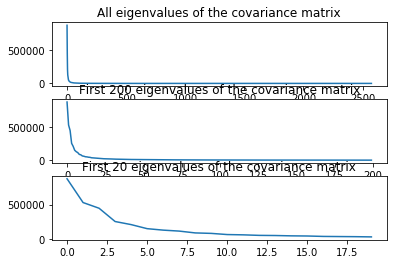

In [27]:
# take absolute value of the eigenvalues (complex eigenvalues are the result of calculation rounding errors)
eigvals = np.real(eigvals)
print (eigvals, eigvals.shape)
eigvecs = np.real(eigvecs)
print (eigvecs, eigvecs.shape)

# order them
print (eigvals.argsort(), eigvals.argsort().shape)
index = eigvals.argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector eigvals)
print (index, index.shape)
eigvals = eigvals[index]
eigvecs = eigvecs[:,index]

x = np.arange(0, 2576)
print (x, x.shape)
print (eigvals, eigvals.shape)

# plot them
plt.subplot(3, 1, 1)
plt.plot(x, eigvals) # clearly out of scale, so let's just take the first 200 of them
plt.title('All eigenvalues of the covariance matrix')

plt.subplot(3, 1, 2)
plt.plot(x[:200], eigvals[:200]) # still out of scale, so let's just take the first 20 of them
plt.title('First 200 eigenvalues of the covariance matrix')

plt.subplot(3, 1, 3)
plt.plot(x[:20], eigvals[:20])
plt.title('First 20 eigenvalues of the covariance matrix')
plt.show()

In [29]:
# We just keep the first n eigenvectors and eigenvalues

n = 500
eigvecs_best = eigvecs[:, :n]
eigvals_best = eigvals[:n]
print (eigvecs_best, eigvecs_best.shape)
print (eigvals_best, eigvals_best.shape)

# Projecting each training data point to the space spanned by the eigenvectors
proj_pca_train_norm = np.zeros((416, n))
for i in range(416):
    proj_pca_train_norm [i, :] = np.dot(pca_train_norm[i, :], eigvecs_best)
    
print (proj_pca_train_norm, proj_pca_train_norm.shape)

# Now in array proj_pca_train_norm, in each row, we have the projected coordinates for each face image

[[-1.26595986e-02  1.31692452e-02 -1.51214959e-02 ... -2.56431551e-03
   3.01614281e-03  3.01614281e-03]
 [-1.41806293e-02  1.33528151e-02 -1.61447622e-02 ... -6.94223416e-05
   1.53029881e-03  1.53029881e-03]
 [-1.48982068e-02  1.36752944e-02 -1.76913957e-02 ... -1.55184138e-03
  -1.93902594e-03 -1.93902594e-03]
 ...
 [ 9.21227987e-03 -4.49123612e-02  2.04615819e-03 ...  1.08373117e-02
   1.62577372e-02  1.62577372e-02]
 [ 8.69456155e-03 -4.46390994e-02  2.23799461e-03 ...  3.30160862e-02
   8.64871610e-03  8.64871610e-03]
 [ 8.22806305e-03 -4.56147892e-02  3.29355134e-03 ...  4.10800594e-04
  -1.48856083e-02 -1.48856083e-02]] (2576, 500)
[8.74127044e+05 5.28699548e+05 4.46022042e+05 2.53294059e+05
 2.08582681e+05 1.49610847e+05 1.28274533e+05 1.14349167e+05
 8.78693480e+04 8.10627149e+04 6.40721467e+04 5.98482690e+04
 5.21432420e+04 5.00777046e+04 4.52918666e+04 4.30563171e+04
 3.69530112e+04 3.50568631e+04 3.33587086e+04 3.01239951e+04
 2.96913017e+04 2.70120661e+04 2.50216970e+04 2

[193. 193. 192. ...  21.  21.  21.] (2576,)


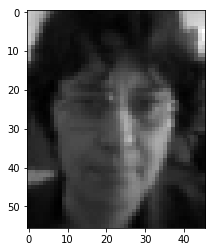

In [33]:
# Let's try to reconstruct one face image, just as a sanity check to see if it is still the same face (worse quality of course, because we did a lossy transformation on it)
face_check = avg_face + np.dot(eigvecs_best, proj_pca_train_norm[414, :])
print (face_check, face_check.shape)
plt.imshow(np.reshape(face_check, (46,56)).T, cmap = 'gist_gray')

In [22]:
# Now that we've trained our model, let's test it on our testing data set
# First, let's normalise the testing set (subtract the average face from all face images)

pca_test_norm = pca_test-avg_face # Works because of broadcasting
print (pca_test_norm, pca_test_norm.shape)

# Then let's project each testing image to the eigenspace (space spanned by the best eigenvectors)
proj_pca_test_norm = np.zeros((104, n))
for i in range(104):
    proj_pca_test_norm [i, :] = np.dot(pca_test_norm[i, :], abs(eigvecs_best))
    
print (proj_pca_test_norm, proj_pca_test_norm.shape)

# Now in array proj_pca_train_norm, in each row, we have the projected coordinates for each face image

[[-21.54326923 -15.         -15.22596154 ... -71.32692308 -71.76201923
  -71.20913462]
 [ 87.45673077  35.           2.77403846 ... -56.32692308 -51.76201923
  -50.20913462]
 [128.45673077 130.         132.77403846 ...  73.67307692  70.23798077
   83.79086538]
 ...
 [ 18.45673077  28.          37.77403846 ... -61.32692308 -61.76201923
  -61.20913462]
 [-71.54326923 -47.         -46.22596154 ... -58.32692308 -56.76201923
  -56.20913462]
 [127.45673077 126.         119.77403846 ... -48.32692308 -47.76201923
  -49.20913462]] (104, 2576)
[[ -419.38879229 -1250.7474567   -549.85236247 ...  -712.33228484
   -728.36465827  -728.36465827]
 [  985.82480322  -597.64819031   520.16889474 ...   400.67785469
    469.92508766   469.92508766]
 [  433.16275869   449.44765692   591.64919979 ...   469.44270856
    427.22608937   427.22608937]
 ...
 [-1463.03633692 -1349.14298607 -1551.30267942 ... -1525.03115501
  -1540.83608849 -1540.83608849]
 [  204.47577934    65.103477     504.94023797 ...   257.90

In [ ]:
# Let's try to reconstruct one testing face image, just as a sanity check to see if it is still the same face (worse quality of course, because we did a lossy transformation on it)
face_check_test = avg_face + np.dot(abs(eigvecs_best), proj_pca_train_norm[414, :])
print (face_check, face_check.shape)
plt.imshow(np.reshape(face_check, (46,56)).T, cmap = 'gist_gray')

In [ ]:
# Let's try to reconstruct one face image, just as a sanity check to see if it is still the same face (worse quality of course, because we did a lossy transformation on it)
face_check_test = avg_face + np.dot(abs(eigvecs_best), proj_pca_train_norm[414, :])
print (face_check, face_check.shape)
plt.imshow(np.reshape(face_check, (46,56)).T, cmap = 'gist_gray')

In [30]:
face_157 = face_data[:,157]

print(face_157.shape)
print(face_157)

(2576,)
[ 55  55  54 ... 168 168 174]


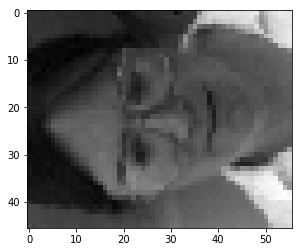

In [5]:
# face data is in 46x56 format

face_157 = np.reshape(face_157,(46,56))

plt.imshow(face_157, cmap = 'gist_gray')

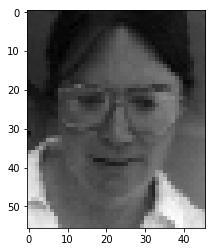

In [6]:
face_157 = face_157.T
plt.imshow(face_157,cmap = 'gist_gray')

In [7]:
face_labels = mat_content['l']
print(face_labels[0,157])

16


In [8]:
print(face_157)
print(face_157.shape)

[[ 55  53  56 ...  70  69  75]
 [ 55  54  54 ...  70  69  66]
 [ 54  55  55 ...  69  70  69]
 ...
 [188 185 176 ... 172 172 168]
 [184 185 180 ... 178 179 168]
 [182 184 184 ... 181 181 174]]
(56, 46)


In [9]:
pixel_row = 21
pixel_column = 33
print(face_157[pixel_row,pixel_column])

104


[105. 108. 122. ...  83.  67.  58.]


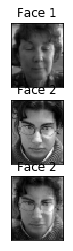

In [10]:
face_1 = face_data[:,5]
face_2 = face_data[:,180]

avg_face = (0.5*face_1 + 0.5*face_2)

plt.subplot(311),plt.imshow(np.reshape(face_1,(46,56)).T, cmap = 'gist_gray')
plt.title('Face 1'), plt.xticks([]), plt.yticks([])
plt.subplot(312),plt.imshow(np.reshape(face_2,(46,56)).T, cmap = 'gist_gray')
plt.title('Face 2'), plt.xticks([]), plt.yticks([])
plt.subplot(313),plt.imshow(np.reshape(avg_face,(46,56)).T, cmap = 'gist_gray')
plt.title('Face 2'), plt.xticks([]), plt.yticks([])

print(avg_face)
plt.show()

(2576,)
(2, 2576)


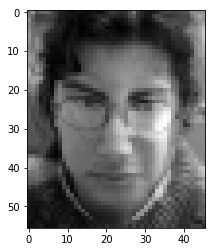

In [11]:
face_stack = np.vstack((face_1,face_2))
print(face_1.shape)
print(face_stack.shape)

avg_face_numpy = np.mean(face_stack, axis = 0)
plt.imshow(np.reshape(avg_face_numpy,(46,56)).T, cmap = 'gist_gray')